# We are going to build a Stock Investment Model

# Author: Tina Liu

## Step 1. Load data from Yahoo Finance and process data

In [1]:
## Import packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pandas_datareader import data, wb
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

In [2]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 5, 1) 
# extract data from 1/1/2016 to 05/01/2017
select_stock = ['AAPL','FB','IBM','LNKD','AMZN','PYPL',
                'JD','XRX','TMUS','TSLA']
#put stock index for selected stock
stockdata = web.DataReader(select_stock, 'yahoo', start, end)
OpenPrice = DataFrame(data = {
                  'Date':stockdata.major_axis.strftime("%Y-%m-%d"),
                  'AAPL':list(stockdata.minor_xs('AAPL')['Open']),
                  'FB':list(stockdata.minor_xs('FB')['Open']),
                  'IBM':list(stockdata.minor_xs('IBM')['Open']),
                  'LNKD':list(stockdata.minor_xs('LNKD')['Open']),
                  'AMZN':list(stockdata.minor_xs('AMZN')['Open']),
                  'PYPL':list(stockdata.minor_xs('PYPL')['Open']),
                  'JD':list(stockdata.minor_xs('JD')['Open']),
                  'XRX':list(stockdata.minor_xs('XRX')['Open']),
                  'TMUS':list(stockdata.minor_xs('TMUS')['Open']),
                  'TSLA':list(stockdata.minor_xs('TSLA')['Open'])})
OpenPrice = OpenPrice[['Date','AAPL', 'FB', 'IBM','LNKD',
                       'AMZN','PYPL','JD','XRX','TMUS','TSLA']]
OpenPrice.head()

,Date,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
0,2016-01-04,102.610001,101.949997,135.600006,222.059998,656.289978,35.130001,30.660000,10.41,38.860001,230.720001
1,2016-01-05,105.750000,102.889999,136.759995,228.020004,646.859985,34.980000,30.049999,10.30,38.900002,226.360001
2,2016-01-06,100.559998,101.129997,134.380005,224.970001,622.000000,33.700001,29.230000,10.13,39.560001,220.000000
3,2016-01-07,98.680000,100.500000,133.699997,222.190002,621.799988,33.150002,28.340000,9.95,39.380001,214.190002
4,2016-01-08,98.550003,99.879997,133.179993,219.979996,619.659973,33.459999,28.580000,9.94,40.860001,217.860001


In [3]:
ClosePrice = DataFrame(data = {
                  'Date':stockdata.major_axis.strftime("%Y-%m-%d"),
                  'AAPL':list(stockdata.minor_xs('AAPL')['Close']),
                  'FB':list(stockdata.minor_xs('FB')['Close']),
                  'IBM':list(stockdata.minor_xs('IBM')['Close']),
                  'LNKD':list(stockdata.minor_xs('LNKD')['Close']),
                  'AMZN':list(stockdata.minor_xs('AMZN')['Close']),
                  'PYPL':list(stockdata.minor_xs('PYPL')['Close']),
                  'JD':list(stockdata.minor_xs('JD')['Close']),
                  'XRX':list(stockdata.minor_xs('XRX')['Close']),
                  'TMUS':list(stockdata.minor_xs('TMUS')['Close']),
                  'TSLA':list(stockdata.minor_xs('TSLA')['Close'])})
ClosePrice = ClosePrice[['Date','AAPL', 'FB', 'IBM','LNKD',
                         'AMZN','PYPL','JD','XRX','TMUS','TSLA']]
ClosePrice.head()

,Date,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
0,2016-01-04,105.349998,102.220001,135.949997,225.550003,636.989990,34.750000,29.530001,10.30,38.950001,223.410004
1,2016-01-05,102.709999,102.730003,135.850006,229.000000,633.789978,34.310001,30.000000,10.28,40.220001,223.429993
2,2016-01-06,100.699997,102.970001,135.169998,226.080002,632.650024,33.980000,29.760000,10.15,40.049999,219.039993
3,2016-01-07,96.449997,97.919998,132.860001,217.000000,607.940002,33.130001,27.950001,9.87,40.509998,215.649994
4,2016-01-08,96.959999,97.330002,131.630005,215.899994,607.049988,32.689999,27.620001,9.59,39.880001,211.000000


In [4]:
HighPrice = DataFrame(data = {
                  'Date':stockdata.major_axis.strftime("%Y-%m-%d"),
                  'AAPL':list(stockdata.minor_xs('AAPL')['High']),
                  'FB':list(stockdata.minor_xs('FB')['High']),
                  'IBM':list(stockdata.minor_xs('IBM')['High']),
                  'LNKD':list(stockdata.minor_xs('LNKD')['High']),
                  'AMZN':list(stockdata.minor_xs('AMZN')['High']),
                  'PYPL':list(stockdata.minor_xs('PYPL')['High']),
                  'JD':list(stockdata.minor_xs('JD')['High']),
                  'XRX':list(stockdata.minor_xs('XRX')['High']),
                  'TMUS':list(stockdata.minor_xs('TMUS')['High']),
                  'TSLA':list(stockdata.minor_xs('TSLA')['High'])})
HighPrice = HighPrice[['Date','AAPL', 'FB', 'IBM','LNKD',
                       'AMZN','PYPL','JD','XRX','TMUS','TSLA']]
HighPrice.head()

,Date,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
0,2016-01-04,105.370003,102.239998,135.970001,226.399994,657.719971,35.560001,30.660000,10.43,39.020000,231.380005
1,2016-01-05,105.849998,103.709999,136.889999,229.949997,646.909973,34.980000,30.299999,10.41,40.500000,226.889999
2,2016-01-06,102.370003,103.769997,135.580002,231.679993,639.789978,34.009998,30.030001,10.19,40.380001,220.050003
3,2016-01-07,100.129997,101.430000,135.020004,226.100006,630.000000,34.160999,29.150000,10.00,40.680000,218.440002
4,2016-01-08,99.110001,100.500000,133.820007,222.039993,624.140015,33.880001,28.900000,9.99,41.230000,220.440002


In [5]:
LowPrice = DataFrame(data = {
                  'Date':stockdata.major_axis.strftime("%Y-%m-%d"),
                  'AAPL':list(stockdata.minor_xs('AAPL')['Low']),
                  'FB':list(stockdata.minor_xs('FB')['Low']),
                  'IBM':list(stockdata.minor_xs('IBM')['Low']),
                  'LNKD':list(stockdata.minor_xs('LNKD')['Low']),
                  'AMZN':list(stockdata.minor_xs('AMZN')['Low']),
                  'PYPL':list(stockdata.minor_xs('PYPL')['Low']),
                  'JD':list(stockdata.minor_xs('JD')['Low']),
                  'XRX':list(stockdata.minor_xs('XRX')['Low']),
                  'TMUS':list(stockdata.minor_xs('TMUS')['Low']),
                  'TSLA':list(stockdata.minor_xs('TSLA')['Low'])})
LowPrice = LowPrice[['Date','AAPL', 'FB', 'IBM','LNKD',
                     'AMZN','PYPL','JD','XRX','TMUS','TSLA']]
LowPrice.head()

,Date,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
0,2016-01-04,102.000000,99.750000,134.240005,218.830002,627.510010,34.279999,29.000000,10.13,38.459999,219.000000
1,2016-01-05,102.410004,101.669998,134.850006,224.119995,627.650024,33.860001,29.600000,10.23,38.759998,220.000000
2,2016-01-06,99.870003,100.900002,133.619995,224.860001,620.309998,33.209999,29.049999,10.03,39.330002,215.979996
3,2016-01-07,96.430000,97.300003,132.429993,216.250000,605.210022,33.020000,27.650000,9.80,39.270000,213.669998
4,2016-01-08,96.760002,97.029999,131.320007,215.009995,606.000000,32.630001,27.469999,9.54,39.779999,210.770004


In [6]:
Volume = DataFrame(data = {
                  'Date':stockdata.major_axis.strftime("%Y-%m-%d"),
                  'AAPL':list(stockdata.minor_xs('AAPL')['Volume']),
                  'FB':list(stockdata.minor_xs('FB')['Volume']),
                  'IBM':list(stockdata.minor_xs('IBM')['Volume']),
                  'LNKD':list(stockdata.minor_xs('LNKD')['Volume']),
                  'AMZN':list(stockdata.minor_xs('AMZN')['Volume']),
                  'PYPL':list(stockdata.minor_xs('PYPL')['Volume']),
                  'JD':list(stockdata.minor_xs('JD')['Volume']),
                  'XRX':list(stockdata.minor_xs('XRX')['Volume']),
                  'TMUS':list(stockdata.minor_xs('TMUS')['Volume']),
                  'TSLA':list(stockdata.minor_xs('TSLA')['Volume'])})
Volume = Volume[['Date','AAPL', 'FB', 'IBM','LNKD',
                 'AMZN','PYPL','JD','XRX','TMUS','TSLA']]
Volume.head()

,Date,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
0,2016-01-04,67649400.0,37912400.0,5229400.0,1371500.0,9314500.0,12287700.0,18265300.0,9122600.0,4614200.0,6827100.0
1,2016-01-05,55791000.0,23258200.0,3924800.0,1159000.0,5822600.0,11227700.0,9426400.0,6482300.0,5553600.0,3186800.0
2,2016-01-06,68457400.0,25096200.0,4310900.0,1206500.0,5329200.0,8441300.0,12988900.0,6917900.0,7243800.0,3779100.0
3,2016-01-07,81094400.0,45172900.0,7025800.0,1386000.0,7074900.0,11041100.0,18155700.0,10666800.0,8091300.0,3554300.0
4,2016-01-08,70798000.0,35402300.0,4762700.0,1512000.0,5512900.0,7848800.0,15164100.0,11865900.0,3512900.0,3628100.0


## Step2. Calcualte MA20 and restructure all the data
#### Generally MA20 is the average adjusted closing price of past 19 days and market price of today. Here we use closing price of past 19 days and today's closing price (total 20 days) to calucalte MA20. <br>  For better indexing, set Date to be the index of MA20 and delete 'Date' column <br> Because MA20 has fewest dates, we will apply MA20's structure to all other dataframe

In [7]:
MA20Data = ClosePrice.rolling(20).mean().dropna().reset_index(drop = True)
# Set Date to be the index of MA20 and delete 'Date' column
MA20Data.index = MA20Data['Date'] 
MA20 = MA20Data.ix[:,1:] 
MA20.shape 
# Have a look at the structure of MA20: it contains 174 days and 10 stocks

(242, 10)

In [8]:
MA20.head()

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
Date,,,,,,,,,,
2016-02-01,98.328999,99.787501,128.227500,204.101499,599.748999,33.0530,27.32275,9.4210,39.0285,204.181000
2016-02-02,97.785499,100.407001,127.577001,202.995499,595.504498,33.1570,27.07975,9.3535,39.0445,202.149500
2016-02-03,97.467499,100.905001,127.020500,201.107999,590.368500,33.2920,26.77025,9.3015,38.9505,199.652000
2016-02-04,97.262499,101.281000,126.644500,199.417999,585.548999,33.4515,26.53025,9.2625,38.8830,197.466500
2016-02-05,97.140999,101.588501,126.430001,193.986998,580.258499,33.5485,26.31475,9.2420,38.6405,194.814001


## Step3. Set up other dataframe and Restructure them to MA20's structure
#### We create several dataframes in this step: <br> (1) LastTwoDayAveVolume: Create a dataframe consisting the last two day's volume. <br> For example, the cell (' 2016-08-10', 'AAPL') contains the average colume of  ' 2016-08-08' and ' 2016-08-09', which means we should compare 2016-08-10's volumn with average volume of 2016-08-08 and 2016-08-09. <br> (2) Close: Create a dataframe holding Close Price of each day. The time range in ClosePrice dataframe is same as MA20. <br> (3) LastDayLowPrice: Create a dataframe holding last day's trading price . <br> For example, the cell (' 2016-08-10', 'AAPL') contains the lowest price of ' 2016-08-09'. <br> (4) CurrentVolume: Create a dataframe holding Volume of each day. The time range in CurrentVolume dataframe is same as MA20.

In [9]:
LastTwoDayAveVolume = Volume.rolling(2).mean().dropna().reset_index(drop = True)
# Get the average volume of every two days 
LastTwoDayAveVolume.ix[0:len(LastTwoDayAveVolume)-1,0] = LastTwoDayAveVolume['Date'].iloc[1:].reset_index(drop = True)
# Use current date to replace the previous data, so we will get the last two days's average volume corresponding to current day
LastTwoDayAveVolume.index = LastTwoDayAveVolume['Date']
# Use MA20's structure to restructure this dataframe
LastTwoDayAveVolume = LastTwoDayAveVolume.ix[MA20.index,:]
LastTwoDayAveVolume = LastTwoDayAveVolume.ix[:,1:] 
LastTwoDayAveVolume.shape

(242, 10)

In [10]:
LastTwoDayAveVolume.head()

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
Date,,,,,,,,,,
2016-02-01,60047650.0,85107400.0,6095300.0,1740600.0,14346400.0,20789850.0,16722050.0,18009250.0,2492650.0,3722550.0
2016-02-02,52680000.0,54436100.0,5911500.0,2208850.0,10516350.0,19278550.0,11405650.0,20343950.0,3606350.0,4074950.0
2016-02-03,39150350.0,52955650.0,3431100.0,2517050.0,6333550.0,17333300.0,11099350.0,18213350.0,3310350.0,5535600.0
2016-02-04,41660750.0,58348950.0,4755400.0,2973750.0,8180350.0,15926850.0,15746600.0,17605950.0,4057200.0,6852500.0
2016-02-05,46218000.0,47904750.0,5745000.0,5981000.0,8123900.0,12377700.0,20580500.0,13908350.0,4459250.0,6158400.0


In [11]:
# Reconstruct Close Price. Let it has the same time range of MA20. 
ClosePrice.index = ClosePrice['Date']
ClosePrice = ClosePrice.ix[MA20.index,:]
Close = ClosePrice.ix[:,1:] 
Close.shape

(242, 10)

In [12]:
Close.head()

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
Date,,,,,,,,,,
2016-02-01,96.430000,115.089996,124.830002,205.759995,574.809998,37.080002,25.590000,9.43,40.590000,196.940002
2016-02-02,94.480003,114.610001,122.940002,203.429993,552.099976,36.830002,24.670000,8.95,39.270000,182.779999
2016-02-03,96.349998,112.690002,124.720001,191.250000,531.070007,37.009998,23.809999,9.24,38.340000,173.479996
2016-02-04,96.599998,110.489998,127.650002,192.279999,536.260010,37.169998,24.959999,9.37,38.700001,175.330002
2016-02-05,94.019997,104.070000,128.570007,108.379997,502.130005,35.070000,23.639999,9.46,35.660000,162.600006


In [13]:
# Create Last day's lowest price dataframe. 
# Reconstruct it. Let it has the same time range of MA20. 
LastDayLowPrice = LowPrice.copy()
LastDayLowPrice.ix[0:len(LastDayLowPrice)-1,0] = LastDayLowPrice['Date'].iloc[1:].reset_index(drop = True)
LastDayLowPrice.index = LastDayLowPrice['Date']
LastDayLowPrice = LastDayLowPrice.ix[MA20.index,:]
LastDayLowPrice = LastDayLowPrice.ix[:,1:]
LastDayLowPrice.shape

(242, 10)

In [14]:
LastDayLowPrice.head()

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
Date,,,,,,,,,,
2016-02-01,94.349998,108.839996,122.959999,190.179993,570.000000,34.360001,25.500000,9.27,38.849998,188.080002
2016-02-02,95.400002,112.010002,123.709999,197.490005,570.309998,35.590000,25.139999,9.35,39.459999,182.750000
2016-02-03,94.279999,113.199997,122.639999,199.529999,550.090027,36.439999,24.525000,8.91,38.990002,180.229996
2016-02-04,94.080002,109.750000,122.290001,185.050003,521.900024,36.070000,23.370001,8.92,37.230000,170.179993
2016-02-05,95.190002,109.250000,125.000000,186.179993,519.219971,36.540001,23.969999,9.20,37.750000,166.990005


In [15]:
# Reconstruct Volume. Let it has the same time range of MA20. 
Volume.index = Volume['Date']
Volume = Volume.ix[MA20.index,:]
CurrentVolume = Volume.ix[:,1:] 
CurrentVolume.shape

(242, 10)

In [16]:
CurrentVolume.head()

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
Date,,,,,,,,,,
2016-02-01,40943500.0,46132700.0,3574900.0,2471700.0,6355100.0,17356000.0,10915500.0,19089100.0,3646000.0,5297600.0
2016-02-02,37357200.0,59778600.0,3287300.0,2562400.0,6312000.0,17310600.0,11283200.0,17337600.0,2974700.0,5773600.0
2016-02-03,45964300.0,56919300.0,6223500.0,3385100.0,10048700.0,14543100.0,20210000.0,17874300.0,5139700.0,7931400.0
2016-02-04,46471700.0,38890200.0,5266500.0,8576900.0,6199100.0,10212300.0,20951000.0,9942400.0,3778800.0,4385400.0
2016-02-05,46418100.0,76894700.0,7177700.0,44081400.0,9708900.0,16245800.0,19828500.0,13074000.0,7554600.0,9437600.0


## Step4. Building Transaction Model

### Basic concepts: 
#### (1) Transaction: We define each transaction to be the whole period of either a long position investment or a short position investment. For the previous one, a transaction consists of the start of a long position and the close of a long position; for the latter one, a transaction consists of the start of a short position and the close of a short position. <br> (2) Cash Management: Assume we have 10,000 dollars in the beginning, for each stock, we have 1,000 dollars for investment. We will utilize all the 1,000 dollars for each transaction. So a new transaction can only be started when the most recent transaction is closed. For example: We will start a long position for AAPL in 2016-08-05, the closing price is 107.480003 dollars, so we will buy 9.304056 shares (1,000/107.480003), and we will have 1,000 cash outflow. We cannot start another investment for AAPL until we close this long position. <br> (3) Condition for starting a long position: current day's closing price is larger than MA20, and current day's trading volume is larger than last two day's trading volume; Condition for starting a short position: current day's closing price is smaller than MA20, and current day's trading volume is larger than last two day's trading volume; Condition for closing a long position: the stock is in a long position transaction and current closing price smaller than last day's lowest price; Condition for closing a short position: the stock is in a short position transaction and current closing price greater than last day's lowest price. 

### Several Dataframes in this step: 
#### (1) Position: Holding the status of cashflow. There are three unique numbers in position dataframe. 1 denotes cash inflow (when we close a long position, or we start a short position); -1 denotes a cash outflow (when we start a long position, or close a short position). <br> (2) Action: Holding the status of investment behavior. There are three unique values: "Long_Start" denotes we start a long position; "Short_Start" denotes we start a short position, and "Close" denotes we close an investment (no matter a long or a short). <br> (3) Shares: Holding the number of stocks we buy/sell in each transaction. The shares maintains unchanged in the whole period of a transaction. For example: we start a long position for AAPL in 2016-08-05, buying 9.304056 shares. We close this transaction in 2016-08-10, selling 9.304056 shares. 

In [17]:
# Create blank dataframe Position, 
# Action and Shares using MA20's structure. 
Position = MA20.copy()
Position.ix[:,:] = 0
Action = MA20.copy()
Action.ix[:,:] = 0
Shares = MA20.copy()
Shares.ix[:,:] = 0
# Find out the beginning status of each stock
for date in MA20.index:
    for stock in Position.columns:
        stock_examine = Position.ix[:str(date),str(stock)]
        if (sum(stock_examine != 0) == 0): 
            #If a stock haven't started a transaction, all cells for this stock much be 0
            if ((Close.ix[date,stock] > MA20.ix[date,stock]) & 
                (CurrentVolume.ix[date,stock] > LastTwoDayAveVolume.ix[date,stock])):
                # If it satisfied the condition for a long positon
                Position.ix[date,stock] = -1 # We will start long
                Action.ix[date,stock] = 'Long_Start'
            elif ((Close.ix[date,stock] < MA20.ix[date,stock]) & 
                  (CurrentVolume.ix[date,stock] > LastTwoDayAveVolume.ix[date,stock])):
                # If it satisfied the condition for a short positon
                Position.ix[date,stock] = 1 # start short
                Action.ix[date,stock] = 'Short_Start'
            else:
                pass
        else: # If a stock has started a transaction, 
            pass

In [18]:
Action.head() 
# Have a look at the beginning status of each stock

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
Date,,,,,,,,,,
2016-02-01,0,0,0,Long_Start,0,0,0,Long_Start,Long_Start,Short_Start
2016-02-02,0,Long_Start,0,0,0,0,0,0,0,0
2016-02-03,Short_Start,0,Short_Start,0,Short_Start,0,Short_Start,0,0,0
2016-02-04,0,0,0,0,0,0,0,0,0,0
2016-02-05,0,0,0,0,0,Long_Start,0,0,0,0


In [29]:
# Loop over all the stock and date. Identifying all the position status and shares in each transaction. 
for stock in Action.columns:
    for date in MA20.index:
        stock_examine = Action.ix[:str(date),str(stock)]
        if sum(stock_examine != 0) == 0: 
            pass 
            # If our transaction history is 0, we will move to the next day
        else:
        # If our transaction history is not 0, we will examine whether 
        # we closed a transaction, or we are in a transaction
            if ((stock_examine[stock_examine != 0][-1] == 'Close') & 
                (stock_examine.index[stock_examine != 0][-1] != date)):
            # If a transaction closed and the close day is not today, 
            # we can consider long or short a new transaction
                if ((Close.ix[date,stock] > MA20.ix[date,stock]) & 
                     (CurrentVolume.ix[date,stock] > LastTwoDayAveVolume.ix[date,stock])):
                    Position.ix[date,stock] = -1 # start long
                    Action.ix[date,stock] = 'Long_Start'
                    #Shares.ix[date,stock] = 1000/Close.ix[date,stock]
                elif ((Close.ix[date,stock] < MA20.ix[date,stock]) & 
                      (CurrentVolume.ix[date,stock] > LastTwoDayAveVolume.ix[date,stock])):
                    Position.ix[date,stock] = 1 # start short
                    Action.ix[date,stock] = 'Short_Start'
                    #Shares.ix[date,stock] = 1000/Close.ix[date,stock]  
                else:
                    pass
            else: # If a transaction is not closed, we will furthur examine 
                  # whether it's in a long or in a short position transaction
                if ((stock_examine[stock_examine != 0][-1] == 'Long_Start') & 
                (stock_examine.index[stock_examine != 0][-1] != date)):
                    # If in Long position and the close day is not today
                    Long_Index = stock_examine[stock_examine != 0].index[-1] 
                    # Find the date when we start long
                    Shares_Long = 1000/Close.ix[Long_Index,stock] 
                    # How many shares we long in this transaction
                    Shares.ix[Long_Index,stock] = Shares_Long 
                    # Put the shares we long into Shares dataframe
                    if (Close.ix[date,stock] < LastDayLowPrice.ix[date,stock]):
                    # If close price is smaller than last day's lowest price, we close the long
                        Position.ix[date,stock] = 1 
                        # 1 indicates we close the transaction, getting cash inflow
                        Action.ix[date,stock] = 'Close'
                        Shares.ix[date,stock] = Shares_Long 
                        # We will close the number of shares we long in this transaction
                    else:
                        pass # If not, we keep the stock
                elif ((stock_examine[stock_examine != 0][-1] == 'Short_Start')
                       &(stock_examine.index[stock_examine != 0][-1] != date)): 
                    # If in Long position and the close day is not today
                    Short_Index = stock_examine[stock_examine != 0].index[-1] 
                    # Find the date when we start long
                    Shares_Short = 1000/Close.ix[Short_Index,stock]
                    Shares.ix[Short_Index,stock] = Shares_Short 
                    # Put the shares we long into Shares dataframe
                    if (Close.ix[date,stock] > LastDayLowPrice.ix[date,stock]):
                        # If close price is greater than last day's lowest price, we close the long
                        Position.ix[date,stock] = -1
                        Action.ix[date,stock] = 'Close'
                        Shares.ix[date,stock] = Shares_Short
                    else:
                        pass # If not, we keep the stock
                else: # If today is the day we long or short a stock
                    pass # We will continue to next day

#### Examine whether we will make duplicate long or short. For example, we won't allow long_Start - Long_Start - Close; or we won't along Long_Start - Close - Close. That is: we should confirm the cashflow follows negative - positive - negative; or positive - negative - positive pattern.

In [30]:
# If we have duplicate long or short, it will give a warning. 
for date in MA20.index:
    for stock in Position.columns:
        stock_examine = Position.ix[:str(date),str(stock)]
        if (sum(stock_examine) == 2) or (sum(stock_examine) == -2):
            print ('Duplicate Value detected')
        else:
            pass
# No warning detected, so no duplicate long or short

In [31]:
# Action DataFrame contains our investment behaviors
Action.head()

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
Date,,,,,,,,,,
2016-02-01,0,0,0,Long_Start,0,0,0,Long_Start,Long_Start,Short_Start
2016-02-02,0,Long_Start,0,0,0,0,0,Close,Close,Close
2016-02-03,Short_Start,Close,Short_Start,Close,Short_Start,0,Short_Start,0,Short_Start,Short_Start
2016-02-04,Close,0,Close,Short_Start,Close,0,Close,0,Close,Close
2016-02-05,Short_Start,Long_Start,Long_Start,0,Short_Start,Long_Start,0,0,Short_Start,Short_Start


In [32]:
# Shares DataFrame contains how many shares we invest
Shares.head()

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
Date,,,,,,,,,,
2016-02-01,0.000000,0.000000,0.000000,4.860031,0.000000,0.0000,0.000000,106.044539,24.636610,5.077689
2016-02-02,0.000000,8.725242,0.000000,0.000000,0.000000,0.0000,0.000000,106.044539,24.636610,5.077689
2016-02-03,10.378827,8.725242,8.017960,4.860031,1.882991,0.0000,41.999162,0.000000,26.082420,5.764353
2016-02-04,10.378827,0.000000,8.017960,5.200749,1.882991,0.0000,41.999162,0.000000,26.082420,5.764353
2016-02-05,10.636035,9.608917,7.777864,0.000000,1.991516,28.5144,0.000000,0.000000,28.042625,6.150061


In [33]:
# Trading dataframe contains the cashflow in each transaction
Trading = Position * Close * Shares
TradingDays = np.array(Trading.index)
Trading.head()

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
Date,,,,,,,,,,
2016-02-01,0.000000,0.000000,0.000000,-1000.000000,0.000000,0.0,0.000000,-1000.000000,-1000.000000,1000.000000
2016-02-02,0.000000,-1000.000000,0.000000,0.000000,0.000000,0.0,0.000000,949.098621,967.479675,-928.099914
2016-02-03,1000.000000,983.247544,1000.000000,929.480971,1000.000000,0.0,1000.000000,0.000000,1000.000000,1000.000000
2016-02-04,-1002.594707,0.000000,-1023.492631,1000.000000,-1009.772729,0.0,-1048.299036,0.000000,-1009.389697,-1010.664088
2016-02-05,1000.000000,-1000.000000,-1000.000000,0.000000,1000.000000,-1000.0,0.000000,0.000000,1000.000000,1000.000000


In [34]:
Action.head()

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
Date,,,,,,,,,,
2016-02-01,0,0,0,Long_Start,0,0,0,Long_Start,Long_Start,Short_Start
2016-02-02,0,Long_Start,0,0,0,0,0,Close,Close,Close
2016-02-03,Short_Start,Close,Short_Start,Close,Short_Start,0,Short_Start,0,Short_Start,Short_Start
2016-02-04,Close,0,Close,Short_Start,Close,0,Close,0,Close,Close
2016-02-05,Short_Start,Long_Start,Long_Start,0,Short_Start,Long_Start,0,0,Short_Start,Short_Start


## Step5. Examine the monthly transaction for each stock
#### Assumption: we won't examine profit by calendar month, rather, we will examine profit by all closed the transactions within a month, if a transaction is not closed in a certain month, we will consider it in the next month. For example: The last transaction date for AAPL in month 2016-08 is 2016-08-26 (We close a short transaction in 8-26), There's a short started in 8-31 for AAPL, but it isn't closed in month 2016-08, so we will put the short transaction into Septmber's profit.  Table Revenue_Month contains the information whether we put an investment for a certain stock in the current month or in the next month. 

In [35]:
# Create a Year_Month column, and insert it into Trading dataframe
Year_Month = []
import re
for Date in TradingDays:
    Year_Month.append(re.match(r'\d+-\d+', Date).group(0))
Trading['Year_Month'] = Year_Month

In [37]:
# Table Revenue_Month contains the information whether we put an investment 
# for a certain stock in the current month or in the next month.
Revenue_Month = MA20.copy()
Revenue_Month.ix[:,:] = 0
Cashflow = pd.DataFrame(0, columns = Trading.columns[:-1],
                        index = np.unique(Year_Month))
for stock in Action.columns:
    for Month in np.unique(Year_Month):
        Start_date = Revenue_Month[str(stock)][Revenue_Month[str(stock)] == 0].index[0]
        End_month = Trading[Trading.Year_Month == Month].index[-1]
        Which_Month = Action.ix[Start_date:End_month,str(stock)]
        if (sum(Which_Month != 0) == 0) or (sum(Which_Month != 0) == 1):
            # if do not have cashflow or just have one transaction (not close)
            pass # pass to the next month
        else:
            if (Which_Month[Which_Month != 0][-1] == 'Close'):
                # If all the transactions are closed
                End_Index = Which_Month[Which_Month != 0].index[-1]
                # The date when the last transaction closed, 
                # is the day we close the revenue month
            else:
                End_Index = Which_Month[Which_Month != 0].index[-2]
            Revenue_Month.ix[Start_date:End_Index,str(stock)] = Month
            Cashflow.ix[Month, stock] = sum(Trading.ix[Start_date:End_Index,str(stock)]) 

## Step 6. Showing monthly return on investment 

In [38]:
# Show percentage return
ROI = Cashflow.copy()
ROI.ix[:,:] = 0
for Stock in ROI.columns:
    for Month in ROI.index:
        ROI.ix[Month, Stock] = '{:.3%}'.format(Cashflow.ix[Month,Stock]/1000)
ROI.head()

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
2016-02,-2.243%,-9.583%,-4.893%,31.943%,-2.503%,-8.910%,-7.375%,-6.017%,-1.357%,10.216%
2016-03,9.958%,3.863%,6.676%,-8.603%,-1.461%,7.524%,-7.792%,8.021%,0.054%,21.358%
2016-04,3.784%,-10.391%,-4.887%,1.968%,3.813%,-1.975%,14.573%,-8.206%,2.146%,9.698%
2016-05,10.404%,-2.178%,-2.806%,2.860%,-1.267%,-0.233%,4.039%,1.425%,-0.384%,2.963%
2016-06,2.513%,1.201%,-1.817%,1.255%,-3.845%,0.271%,2.933%,2.738%,3.524%,10.567%


In [39]:
# Showing how much money we get out of 1,000 dollars 
# investment for each stock in each month
Cashflow

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
2016-02,-22.428018,-95.833804,-48.929431,319.434096,-25.026710,-89.103102,-73.748309,-60.169839,-13.574917,102.158704
2016-03,99.583769,38.634558,66.764423,-86.029645,-14.613719,75.237064,-77.921479,80.206889,0.535331,213.582879
2016-04,37.843178,-103.905371,-48.867782,19.679406,38.128091,-19.751256,145.728634,-82.057690,21.462362,96.981718
2016-05,104.042138,-21.780116,-28.056917,28.601967,-12.670957,-2.325698,40.393895,14.245604,-3.836368,29.630542
2016-06,25.132680,12.013035,-18.172970,12.550241,-38.449390,2.706632,29.329212,27.384319,35.241551,105.672912
2016-07,-2.731291,0.685536,58.242167,1.369744,8.208253,-35.745038,-52.327129,-24.332505,-10.586858,14.542655
2016-08,55.836119,54.846344,-5.043455,1.048429,-20.659590,-34.226539,97.652357,-6.988071,44.848593,35.628903
2016-09,36.143588,7.120102,-29.707796,-3.031739,40.797184,-27.389820,-21.476982,-28.328694,-127.255153,-68.604439
2016-10,23.444088,-21.099030,-38.895942,4.094918,20.022119,56.251107,-50.015471,-78.199135,-17.423938,10.018404
2016-11,-10.581103,48.561269,27.399979,-12.501641,-35.265930,-44.049917,-80.761840,-67.902839,143.248882,24.125664


In [45]:
# Showing how the contribution percentage for each stock in each month
# For example, The contribution for AAPL in month 8 is : 
# AAPL's earning / sum (earnings for each stock)
Relative_performance = Cashflow.copy()
Relative_performance.ix[:,:] = 0
for Stock in Relative_performance.columns:
    for Month in Relative_performance.index:
        Relative_performance.ix[Month, Stock] = '{:.3%}'.format(Cashflow.ix[Month,Stock]/
                                                                sum(Cashflow.ix[Month,:]))
Relative_performance

,AAPL,FB,IBM,LNKD,AMZN,PYPL,JD,XRX,TMUS,TSLA
2016-02,310.580%,1327.093%,677.568%,-4423.479%,346.566%,1233.887%,1021.256%,833.224%,187.984%,-1414.680%
2016-03,25.149%,9.757%,16.861%,-21.726%,-3.691%,19.000%,-19.678%,20.255%,0.135%,53.938%
2016-04,35.958%,-98.731%,-46.434%,18.699%,36.229%,-18.768%,138.471%,-77.971%,20.393%,92.152%
2016-05,70.183%,-14.692%,-18.926%,19.294%,-8.547%,-1.569%,27.248%,9.610%,-2.588%,19.988%
2016-06,12.995%,6.211%,-9.396%,6.489%,-19.880%,1.399%,15.164%,14.159%,18.221%,54.637%
2016-07,6.400%,-1.606%,-136.480%,-3.210%,-19.235%,83.762%,122.619%,57.019%,24.808%,-34.078%
2016-08,25.045%,24.601%,-2.262%,0.470%,-9.267%,-15.352%,43.801%,-3.134%,20.117%,15.981%
2016-09,-16.300%,-3.211%,13.398%,1.367%,-18.399%,12.353%,9.686%,12.776%,57.391%,30.940%
2016-10,-25.537%,22.983%,42.369%,-4.461%,-21.810%,-61.274%,54.481%,85.182%,18.980%,-10.913%
2016-11,136.928%,-628.423%,-354.579%,161.782%,456.371%,570.043%,1045.126%,878.720%,-1853.760%,-312.206%


## Step 7. Showing Portfolio Investment Return Rate

In [46]:
# The return rate for portfolio is the total cashflow of all the stocks 
# in a certain month, divide total investment (10,000 dollars)
portfolio = pd.DataFrame(0, columns = ['Portfolio'], index = Cashflow.index)
for Month in portfolio.index:
    portfolio.ix[Month] = '{:.6%}'.format(sum(Cashflow.ix[Month,:])/10000)
portfolio

,Portfolio
2016-02,-0.072213%
2016-03,3.959801%
2016-04,1.052413%
2016-05,1.482441%
2016-06,1.934082%
2016-07,-0.426745%
2016-08,2.229431%
2016-09,-2.217337%
2016-10,-0.918029%
2016-11,-0.077275%


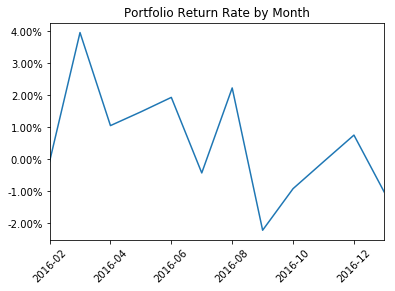

In [47]:
# Show it by picture
%matplotlib inline
portfolio_plot = np.sum(Cashflow, axis = 1)/10000
ax = portfolio_plot.plot()
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.xticks(rotation=45)
plt.title('Portfolio Return Rate by Month')

## Step 8. Example: Transaction for AAPL

In [48]:
Action['AAPL'][Action['AAPL'] != 0]

Date
2016-02-03    Short_Start
2016-02-04          Close
2016-02-05    Short_Start
2016-02-08          Close
2016-02-11    Short_Start
2016-02-12          Close
2016-02-16     Long_Start
2016-02-19          Close
2016-02-24     Long_Start
2016-03-24          Close
2016-03-29     Long_Start
2016-04-05          Close
2016-04-07     Long_Start
2016-04-15          Close
2016-04-18    Short_Start
2016-04-20          Close
2016-04-21    Short_Start
2016-04-22          Close
2016-04-26    Short_Start
2016-05-02          Close
2016-05-06    Short_Start
2016-05-09          Close
2016-05-12    Short_Start
2016-05-13          Close
2016-05-16    Short_Start
2016-05-17          Close
2016-05-23     Long_Start
2016-06-01          Close
2016-06-02     Long_Start
2016-06-08          Close
                 ...     
2016-09-12          Close
2016-09-13     Long_Start
2016-09-19          Close
2016-09-23     Long_Start
2016-09-29          Close
2016-09-30     Long_Start
2016-10-19          Close
2016-10